## Paper : Asynchronous Methods for Deep Reinforcement Learning

### Main focus
The paper provides a different paradigm of learning polices by using asynchronous gradient descent for optimization of deep neural network controllers and presents asynchronous variants of four standard RL algorithms and show that parallel actor-learners have a stabilizing effect on training allowing faster training (half the time on a single multi-core CPU instead of GPU.

It replaces experience repaly by asynchronously executing multiple agents in parallel on multiple instances of the environment.
This parallism handles non-stationarity and decorrelates the states since at any given time-step parallel agents will be experiencing several different states.

Another key focus of the paper is its pratical usage wherein the authors demonstrate great performance on a multi-core CPU rather than using GPU , which was an essential part of earlier algorithms.

Goal : To make a transition from the earlier works restricted to off-policy learning , while continuing to alleviate the problem of highly correlated data (IID assumption) and non-stationarity of targets.The authors call is Asysnchronous Advatage actor-critic (A3C) algorithm.

## Challenges/Problems Identified
- Most of the earlier methods are restricted to off-policy learning, which could update from data generated from an older policy.
- Using experience replay, requires more memory and computation per real interaction.

### Related Literature
- The general reinforcement Learning algorithm (GORILA) from Nair et al, 2015 performs asynchronous training of agents in a distributed setting.
- Other works related to parallezing DQN

## Architecture Details
- The paper investigates the performance of asynchronous on one-step sarsa, one-step q-learning, and advantage actor critic 
- Used the GORILA framework with the change of using multiple threads on a single machine instead of using seaprate machines and a parameter server
- Observed that multiple actor-learners running in parallel are likely to explore different parts of the env

### Asynchronous one-step Q-learning

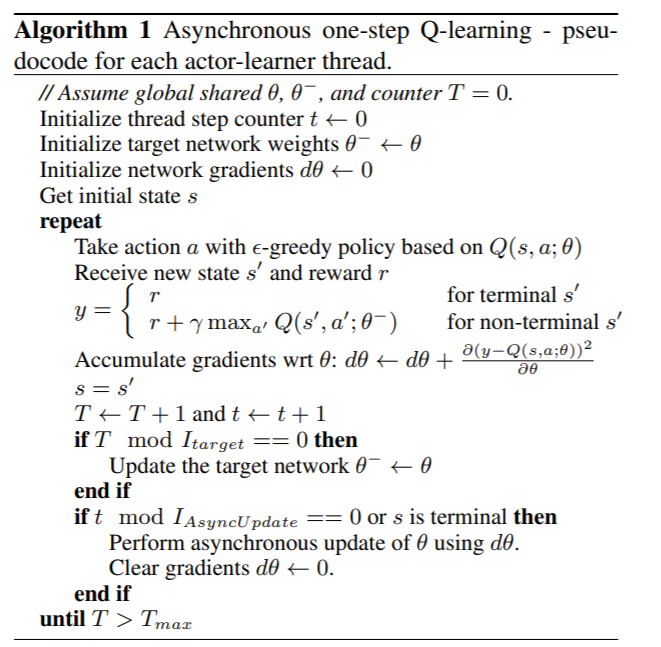

In [2]:
from IPython.display import Image
Image(filename='a3c1.png')

- Eahc thread interacts with own copy/instance of env and calculates the gradient of the Q-learning loss at each step
- Target network same as Nature DQN
- Gradients are accumulated over timesteps to reduce the chances of multiple actor learners overwriting each other's updates.
- It was observed that giving each thread a different exploration policy helps improves robustnbess and adds diversity of exploration

### Asynchronous one-step sarsa
- Same as the above Async version of Q-learning except using a different target value of $\mathcal{Q}(s,a)$, target value used here is $r + \lambda \mathcal{Q}(s', a';\theta_{'})$
- Uses target network and accumulates updates as above

### Asynchronous n-step Q-learning

**Excerpt from the paper**

In order to compute a single update, the algorithm first selects actions using its exploration policy for up to tmax steps or until a terminal state is reached. This process results in the agent receiving up to tmax rewards from the environment since its last update. The algorithm then computes gradients for n-step Q-learning updates for each of the state-action pairs encountered since the last update. Each n-step update uses the longest possible n-step return resulting in a one-step update for the last state, a two-step update for the second last state, and so on for a total of up to tmax updates. The accumulated updates are applied in a single gradient step.

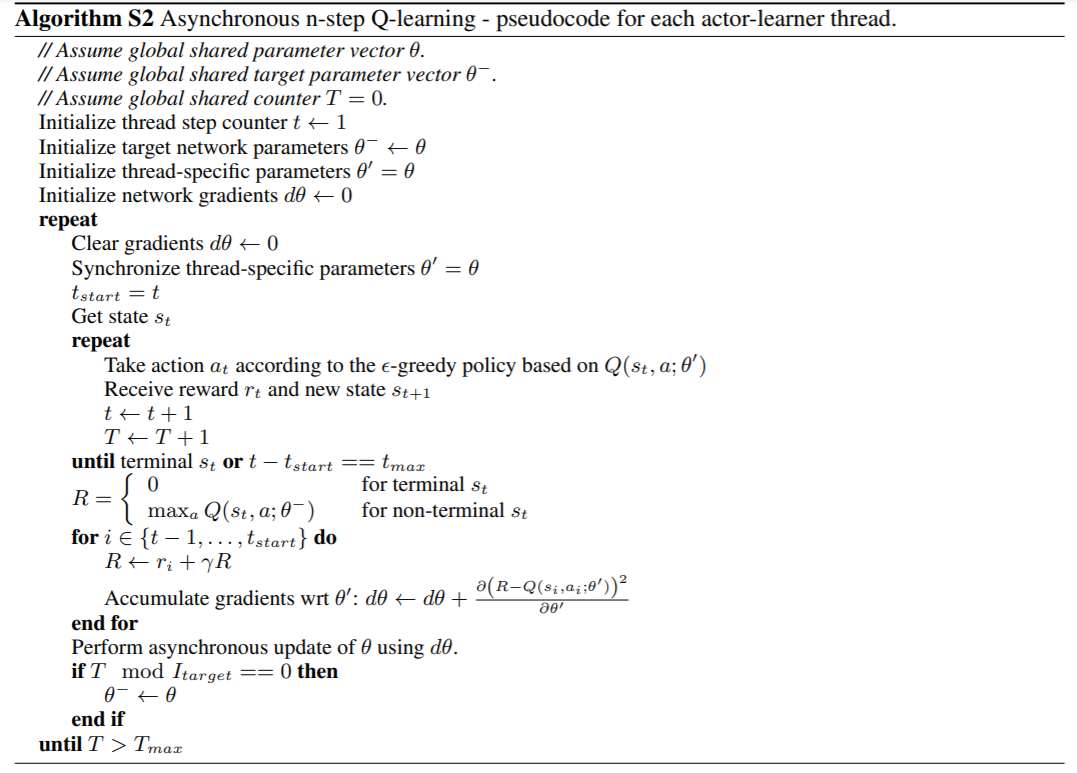

In [4]:
from IPython.display import Image
Image(filename='a3c2.png')

### Asynchronous Advantage Actor critic(A3C)

- maintians a policy $\pi(a_t|s_t; \theta)$ and an estimate of the value function $V(s_t;\theta_{v})$
- The policy and the value fucntion are updated after every $\mathcal{t}_{max}$ actions or when a terminal state is reached.

**Important Observation**
Adding the entropy of the policy $\pi$ to the objective function improved exploration by discouraging premature convergance to sub-optimal deterministic policies. 

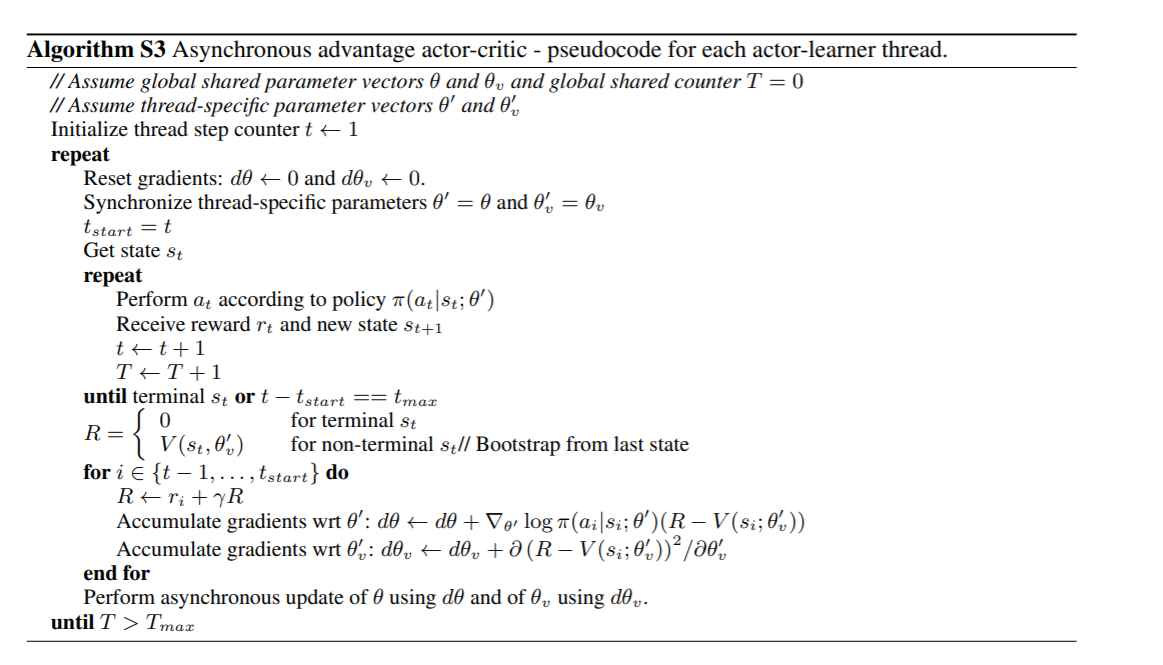

In [5]:
from IPython.display import Image
Image(filename='a3c3.png')

### Optimization 

Three different algos were tried
- SGD with momentum 
- RMSProp with shared statistics - proved to be more robust than other two 
- RMSProp without shared statistics

### Experimental details
- Comparisons were performed on TORCS 3D car racing simulator , MujUco and la